## Do the same for faces

In [16]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


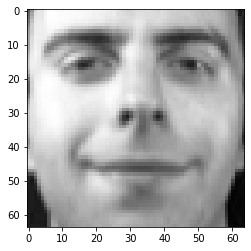

In [19]:
from VAE_faces import FacesDataset
from matplotlib import pyplot as plt

# Showing a face:
faces = FacesDataset()
plt.imshow(faces[0][0].permute(1,2,0), cmap='gray');
plt.show();

In [3]:
%autoreload

from VAE import train
from VAE_faces import VaeFaces, faces_loader

vae, train_losses, test_losses = train(
    VaeFaces(),
    epochs=1000, 
    post_epoch_every=10,
    train_loader=faces_loader(train=True),
    test_loader=faces_loader(train=False),
    checkpoint_path='generated/vae_faces',
)

Epoch: 1, Train loss: 2837.688973214286, Test loss: 2821.062861328125
Epoch: 11, Train loss: 2760.051908482143, Test loss: 2761.906767578125
Epoch: 21, Train loss: 2749.187957589286, Test loss: 2745.98625
Epoch: 31, Train loss: 2742.9618080357145, Test loss: 2739.812119140625
Epoch: 41, Train loss: 2741.436104910714, Test loss: 2740.924521484375
Epoch: 51, Train loss: 2732.8835825892857, Test loss: 2733.49158203125
Epoch: 61, Train loss: 2715.8302678571426, Test loss: 2714.212451171875
Epoch: 71, Train loss: 2704.2126339285714, Test loss: 2706.41763671875
Epoch: 81, Train loss: 2693.4318638392856, Test loss: 2694.23123046875
Epoch: 91, Train loss: 2690.8347209821427, Test loss: 2692.095166015625
Epoch: 101, Train loss: 2688.63953125, Test loss: 2689.64912109375
Epoch: 111, Train loss: 2686.823671875, Test loss: 2688.15923828125
Epoch: 121, Train loss: 2686.0313058035713, Test loss: 2687.541787109375
Epoch: 131, Train loss: 2684.7047098214284, Test loss: 2686.0279296875
Epoch: 141, Trai

In [4]:
from VAE import save_model

save_model(
    'generated/vae_faces/',
    vae, train_losses, test_losses
)

In [23]:
from VAE import load_model
from VAE_faces import VaeFaces

vae, train_losses, test_losses = load_model(
    'generated/vae_faces/', VaeFaces())

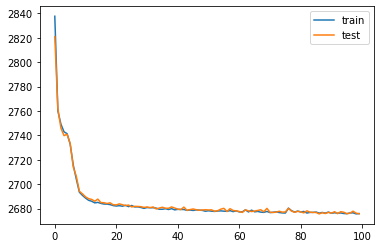

In [21]:
from matplotlib import pyplot as plt

fig = plt.figure()
plt.plot(train_losses[0::10])
plt.plot(test_losses)
plt.legend(['train','test'])
plt.show();

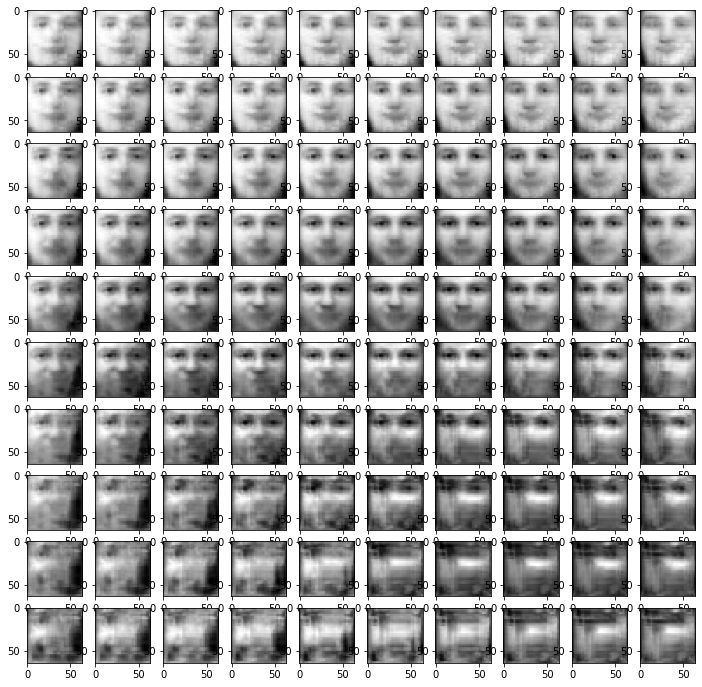

In [22]:
%autoreload
import numpy as np
from VAE import vae_samples_2d, plot_vae_samples_2d

# Generating new samples:
samples = vae_samples_2d(
    vae, 
    np.linspace(-2,2,10), 
    np.linspace(-2,2,10))
plot_vae_samples_2d(
    samples,
    cmap='gray'
)

### Why bad results?

- __Too few samples__ (300) for a such complex distribution.
- Naive network, some "tricks" missing there.
- In such a setting the result is interesting anyway.

Some achievable results (using the [CelebA](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset):

<img src="images/vae_faces.png" width="600pt"/>